In [2]:
# Import required libraries
import tensorflow as tf # For model construction we'll use tensorflow and keras
from tensorflow import keras
from tensorflow.keras import layers
from keras.datasets import mnist # MNIST dataset
import numpy as np
import matplotlib.pyplot as plt # To plot
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix # Evaluation metrics


# Note: if you're working without a GPU and have issues installing tensorflow you can try:
# pip install tensorflow-cpu

In [4]:
# The dataset already comes splitted
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
# The datasets consists of 28x28 sized images for every digit with their respectiv layer
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Text(0.5, 1.0, 'Digit is 5')

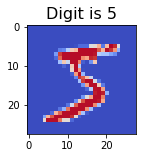

In [14]:
# Visualizing an example from the training set to see how the dataset looks

fig, ax = plt.subplots(1, figsize=(2,2))
ax.imshow(x_train[0], cmap='coolwarm') # First digit from the train set
ax.set_title(f'Digit is {y_train[0]}', fontsize=16) # Label is

In [15]:
# We transform the labels into categories taken into account the number of classes (10 digits)
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [16]:
# We then normalize the features and reshape them so
#  the input is a 1D vector that takes values from 0 to 1

# Normalize the features
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape the features
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

In [18]:
28*28

784

In [22]:
# We will then create a model using tensorflow's sequential method

model = keras.Sequential(
    [
        layers.Dense(input_shape=(28*28,), units=128, activation='relu'),
        layers.Dense(units=128, activation='relu'),
        layers.Dense(units=10, activation='softmax')
    ]
)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 dense_13 (Dense)            (None, 128)               16512     
                                                                 
 dense_14 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
